<a href="https://colab.research.google.com/github/Wasif-Abu-Dujana/Alloy_Machine_Learning/blob/main/Ni_alloy_shear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

Get the datasheet

In [21]:
Fatigue_data = pd.read_excel("/content/Data_Fatigue.xls")
Fatigue_data.describe()



,Ni,Cr,Fe,Co,W,Si,C,Mn,E,LHF,LM,Rho,Elon,sigma,G,UTS,Yield,Fatigue
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.00000,105.000000,105.000000,105.000000,105.000000,105.00000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,60.372762,18.923333,11.353333,2.273333,0.797143,0.78619,0.270952,0.926810,201.285714,319.514286,1426.07619,8.552952,32.572381,0.290810,77.876190,783.714286,417.809524,280.447619
std,13.657270,10.870160,11.086208,5.200781,1.898048,0.66180,1.181418,0.513672,15.520281,16.888841,83.12302,0.331883,13.046909,0.012579,5.879716,237.536463,236.736550,124.503011
min,12.090000,0.000000,0.100000,0.000000,0.000000,0.03000,0.000000,0.000000,160.000000,270.000000,1250.00000,7.900000,3.400000,0.260000,61.000000,390.000000,140.000000,68.000000
25%,52.200000,15.500000,3.000000,0.100000,0.000000,0.50000,0.030000,0.500000,200.000000,312.000000,1360.00000,8.300000,25.000000,0.280000,76.000000,620.000000,270.000000,200.000000
50%,62.000000,21.500000,6.000000,0.100000,0.100000,0.50000,0.060000,1.000000,200.000000,320.000000,1420.00000,8.500000,34.000000,0.290000,79.000000,730.000000,310.000000,230.000000
75%,66.900000,25.000000,18.500000,1.000000,0.200000,1.00000,0.150000,1.000000,210.000000,330.000000,1480.00000,8.800000,43.000000,0.290000,82.000000,860.000000,430.000000,340.000000
max,99.000000,50.000000,47.500000,30.000000,15.000000,3.20000,12.000000,3.000000,220.000000,365.000000,1650.00000,9.500000,53.000000,0.320000,86.000000,1530.000000,1330.000000,760.000000


from matplotlib import pyplot as plt
_df_0['Ni'].plot(kind='hist', bins=20, title='Ni')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cr'].plot(kind='hist', bins=20, title='Cr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Fe'].plot(kind='hist', bins=20, title='Fe')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Co'].plot(kind='hist', bins=20, title='Co')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Ni', y='Cr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Cr', y='Fe', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Fe', y='Co', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Co', y='W', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Ni'].plot(kind='line', figsize=(8, 4), title='Ni')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Cr'].plot(kind='line', figsize=(8, 4), title='Cr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Fe'].plot(kind='line', figsize=(8, 4), title='Fe')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Co'].plot(kind='line', figsize=(8, 4), title='Co')
plt.gca().spines[['top', 'right']].set_visible(False)

Data frequency

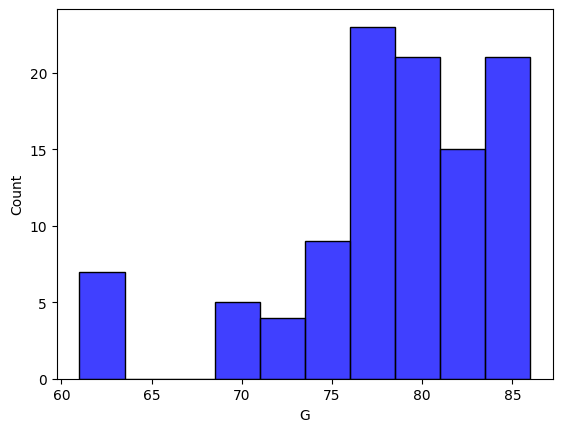

In [34]:
sns.histplot(Fatigue_data['G'], color='blue')
xlabel='Fatigue Strength (MPa)'
ylabel='Count'

Feature correlation Heatmap

<Axes: >

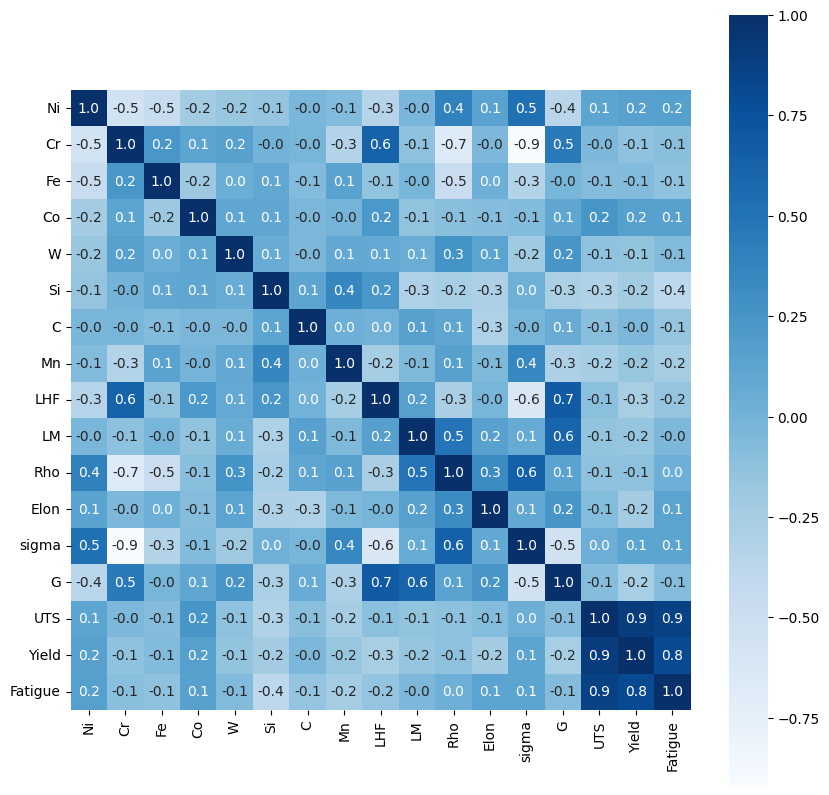

In [93]:

X= Fatigue_data.drop(['E'], axis=1)
correlation=X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

pLOTTING LHF vs G
Plotting LM vs G
Plotting %Cr vs G

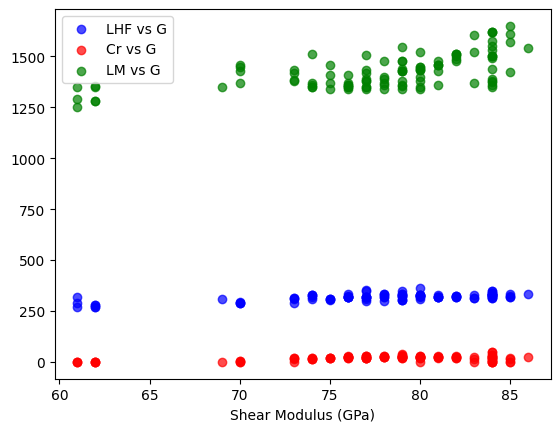

In [92]:
plt.scatter(Fatigue_data['G'], Fatigue_data['LHF'],label='LHF vs G', color='blue', alpha=0.7)
plt.scatter(Fatigue_data['G'], Fatigue_data['Cr'],label='Cr vs G', color='red', alpha=0.7)
plt.scatter(Fatigue_data['G'], Fatigue_data['LM'],label='LM vs G', color='green', alpha=0.7)
#plt.scatter(Fatigue_data['G'], Fatigue_data['E'],label='E vs G', color='black', alpha=0.7)
plt.xlabel('Shear Modulus (GPa)')
legend = plt.legend()
plt.show()

X and Y spliting

In [94]:
X= Fatigue_data.drop(['G','E'], axis=1)
Y= Fatigue_data['G']

Linear Regression

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)
#kfold = KFold(n_splits=10, random_state=7, shuffle=True)

Mean Absolute error :  1.3855245601682795
R squared error :  0.8531191470774822
Mean squared error :  4.47757100080988
Root Mean squared error :  2.1160271739299286


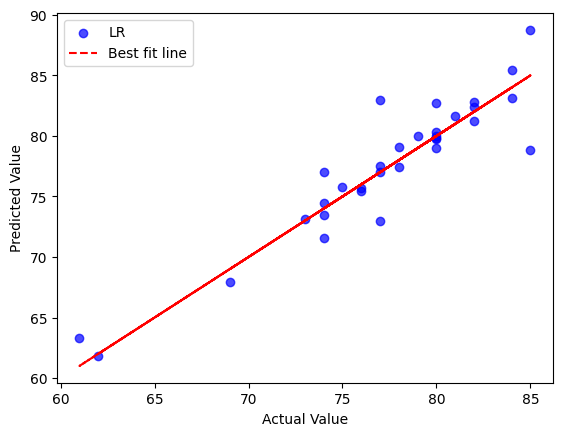

In [133]:
#Linear regression
#kfold = KFold(n_splits=10, random_state=7, shuffle=True)
#poly_reg = PolynomialFeatures(degree = 1)
#X_poly = poly_reg.fit_transform(X)
model= LinearRegression()
#results = cross_val_score(model, X, Y, cv=kfold)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score1= metrics.r2_score(Y_test, Y_pred)
score4= metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute error : ", score4)
print("R squared error : ", score1)
score5= metrics.mean_squared_error(Y_test, Y_pred)
print("Mean squared error : ", score5)
score6= np.sqrt(score5)
print("Root Mean squared error : ", score6)
#idx=np.argsort(Y_test)
plt.scatter(Y_test, Y_pred,label='LR', color='blue', alpha=0.7)
plt.plot(Y_test, Y_test, label='Best fit line', color='red', linestyle='--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

In [ ]:
Random Forrest

Mean Absolute error :  1.7531249999999994
R squared error :  0.814388928754485
Mean squared error :  5.6582374999999985
Root Mean squared error :  2.378705004829308


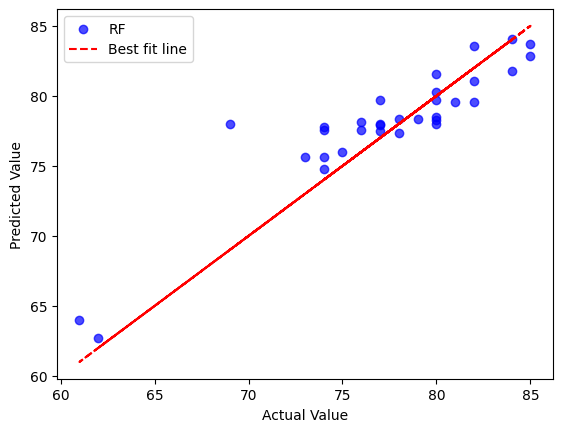

In [134]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model= RandomForestRegressor(n_estimators=100)
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model.fit(X_train, Y_train)
Y_pred1 = model.predict(X_test)
Y_pred = model.predict(X_test)
score1= metrics.r2_score(Y_test, Y_pred)
score4= metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute error : ", score4)
print("R squared error : ", score1)
score5= metrics.mean_squared_error(Y_test, Y_pred)
print("Mean squared error : ", score5)
score6= np.sqrt(score5)
print("Root Mean squared error : ", score6)
#idx=np.argsort(Y_test)
plt.scatter(Y_test, Y_pred,label='RF', color='blue', alpha=0.7)
plt.plot(Y_test, Y_test, label='Best fit line', color='red', linestyle='--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()


**xgboost**
Analogy:

Think of it like this: XGBoost is like a versatile toolbox, and XGBRegressor is a specific tool within that toolbox, perfectly shaped for regression tasks.

When to use what:

If you're tackling a regression problem (predicting a number), you'll likely use the XGBRegressor class from the XGBoost library.

Mean Absolute error :  1.484555721282959
R squared error :  0.8723522847543863
Mean squared error :  3.891260819440504
Root Mean squared error :  1.9726278968524458


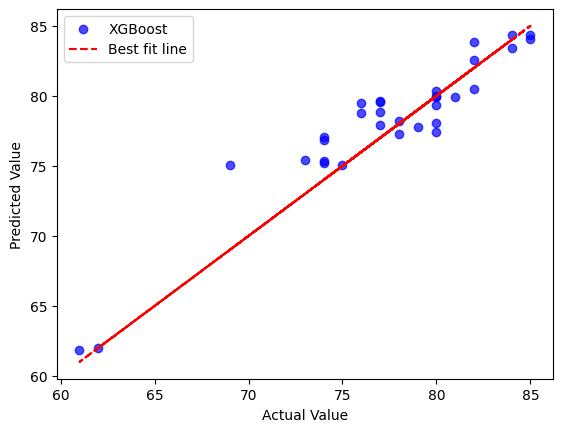

In [136]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model= XGBRegressor()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model.fit(X_train, Y_train)
Y_pred1 = model.predict(X_test)
Y_pred = model.predict(X_test)
score1= metrics.r2_score(Y_test, Y_pred)
score4= metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute error : ", score4)
print("R squared error : ", score1)
score5= metrics.mean_squared_error(Y_test, Y_pred)
print("Mean squared error : ", score5)
score6= np.sqrt(score5)
print("Root Mean squared error : ", score6)
#idx=np.argsort(Y_test)
plt.scatter(Y_test, Y_pred,label='XGBoost', color='blue', alpha=0.7)
plt.plot(Y_test, Y_test, label='Best fit line', color='red', linestyle='--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

Gaussian process

In [124]:
#kernel = C(1.0, (1e-2, 1e10)) * RBF(10, (1e-2, 1e3))
# Define individual kernels
constant_kernel = C(0.1, (1e-5, 1e4))  # Constant offset
rbf_kernel = RBF(10, (1e-2, 1e2))       # Smooth variations
white_kernel = WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-3, 1e-1)) # Noise

# Combine kernels
kernel = constant_kernel + rbf_kernel + white_kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X_train, Y_train)
Y_pred = gp.predict(X_test)
score1= metrics.r2_score(Y_test, Y_pred)
score4= metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute error : ", score4)
print("R squared error : ", score1)
score5= metrics.mean_squared_error(Y_test, Y_pred)
print("Mean squared error : ", score5)
score6= np.sqrt(score5)
print("Root Mean squared error : ", score6)

Mean Absolute error :  2.193517095182475
R squared error :  0.7412783030213044
Mean squared error :  7.886969231334927
Root Mean squared error :  2.8083748381109896


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.1. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Polynomial REgression

Mean Absolute error :  1.131332762852727
R squared error :  0.9332034794218927
Mean squared error :  2.2872340374208364
Root Mean squared error :  1.5123604191530657


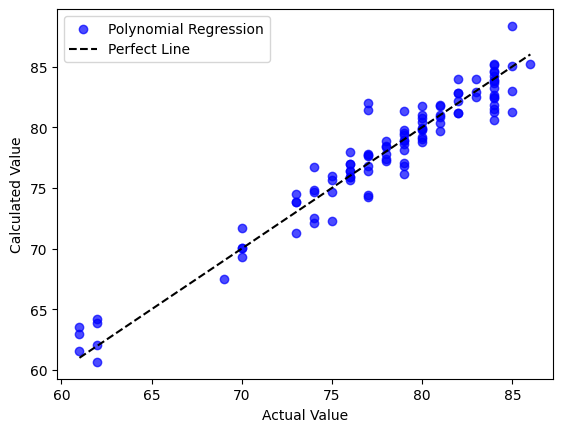

In [137]:
#polynomial features poly regression
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X)
model= LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)
score1= metrics.r2_score(Y, Y_pred)
score4= metrics.mean_absolute_error(Y, Y_pred)
print("Mean Absolute error : ", score4)
print("R squared error : ", score1)
score5= metrics.mean_squared_error(Y, Y_pred)
print("Mean squared error : ", score5)
score6= np.sqrt(score5)
print("Root Mean squared error : ", score6)
idx=np.argsort(Y)
plt.scatter(Y[idx], Y_pred[idx],label='Polynomial Regression', color='blue', alpha=0.7)
plt.plot(Y[idx], Y[idx], label='Perfect Line', color='black', linestyle='--')
plt.xlabel("Actual Value")
plt.ylabel("Calculated Value")
plt.legend()
plt.show()

In [110]:
# Assuming you have already fitted the model as 'model'
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.00000000e+00 -4.98762617e-02 -2.54410168e-02  6.50467834e-02
  8.22098437e-02 -2.28046470e-01 -1.72868723e+00 -2.74944366e-02
  5.79281993e-02  1.71127140e-01  1.74447660e-02  9.70785420e+00
  4.07715409e-02 -2.55854199e+02  3.57755741e-03  3.99796151e-04
 -7.21790694e-03]
Intercept: -8.517688004611571


SVM(SVR)

Mean Absolute error :  1.8368105475531458
R squared error :  0.7975197456763645
Mean squared error :  6.1724840028970736
Root Mean squared error :  2.484448430315484


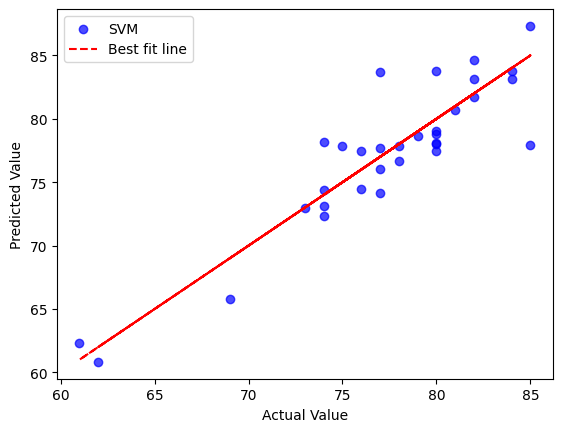

In [138]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model= SVR(kernel='linear')
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model.fit(X_train, Y_train)
Y_pred1 = model.predict(X_test)
Y_pred = model.predict(X_test)
score1= metrics.r2_score(Y_test, Y_pred)
score4= metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute error : ", score4)
print("R squared error : ", score1)
score5= metrics.mean_squared_error(Y_test, Y_pred)
print("Mean squared error : ", score5)
score6= np.sqrt(score5)
print("Root Mean squared error : ", score6)
#idx=np.argsort(Y_test)
plt.scatter(Y_test, Y_pred,label='SVM', color='blue', alpha=0.7)
plt.plot(Y_test, Y_test, label='Best fit line', color='red', linestyle='--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

K neighbor Regressor

Mean Absolute error :  2.28125
R squared error :  0.6611993849308047
Mean squared error :  10.328125
Root Mean squared error :  3.2137400330456103


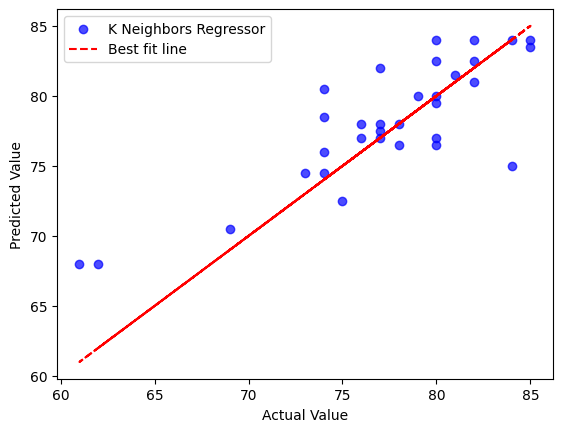

In [139]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model= KNeighborsRegressor(n_neighbors=2)
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model.fit(X_train, Y_train)
Y_pred1 = model.predict(X_test)
Y_pred = model.predict(X_test)
score1= metrics.r2_score(Y_test, Y_pred)
score4= metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute error : ", score4)
print("R squared error : ", score1)
score5= metrics.mean_squared_error(Y_test, Y_pred)
print("Mean squared error : ", score5)
score6= np.sqrt(score5)
print("Root Mean squared error : ", score6)
#idx=np.argsort(Y_test)
plt.scatter(Y_test, Y_pred,label='K Neighbors Regressor', color='blue', alpha=0.7)
plt.plot(Y_test, Y_test, label='Best fit line', color='red', linestyle='--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()